<a href="https://colab.research.google.com/github/mayconbaptista/upsolving_kaggle/blob/main/boston_housing/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing


## Etapa1
* Entendimento do negocio nessa etapas:
1. Objetivos do projeto.
2. Critérios de sucesso.
3. Recursos e continjenciamento.
4. planejamento estrutural.


## Etapa2
* Entendimento dos dados nessa etapa será feitoos seguintes procedimentos:
1. Coleta.
2. Descrição.
3. Exploração.
4. Verificação da qualidade.


In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Dicionário dos dados

| Variável | Definição | Tipo de variável |
|---|---|---|
| CRIM | taxa per capita por cidade | quantitativa continua |
| ZN | proporção de residencial para terrenos zoneados para lotes com mais de 25.000 pés quadrados | quantitativa continua |
| INDUS | proporção de acres comerciais não varejistas por cidade | quantitativa continua |
| CHAS | variável dummy charles rives (=1 se o trato limita o rio, o caso contrário) | qualitativa nominal |
| NOX | concentração de óxidos de nitrogênio (partes por 10 milhões) | quantitativa continua |
| RM | número médio de quartos por habitação | quantitativa continua |
| AGE | proporção de unidades ocupadas pelos proprietários construídas antes de 1940 | quantitativa continua |
| DIS | média ponderada das distâncias até cinco centros de emprego de Boston | quantitativa continua |
| RAD | índice de acessibilidade às rodovias radiais | quantitativa discreta  |
| TAX | taxa de imposto sobre a propriedade de valor total por 10.000 | quantitativa discreta |
| PTRATIO | proporção aluno-professor por cidade | quantitativa continua |
| BLACK | 1000 (Bk - 0,63) ^ onde Bk é a proporção de negros por cidade | quantitativa continua |
| LSTAT | status mais baixo da população (porcentagem) | quantitativa continua |
| MEDV | valor médio das casas ocupadas pelos proprietários em US$ 1.000 (variável alvo) | quantitativa continua |

In [ ]:
try:
  # Executando localmente
  train = pd.read_csv('./boston-housing/train.csv')
  test = pd.read_csv('./boston-housing/test.csv')
  teste_target = pd.read_csv("./boston-housing/submission_example.csv")

except:
  # executado no google colab
  from google.colab import files
  import io

  upload = files.upload()

  for name in upload.keys():
    if name.startswith('train'):
      train = pd.read_csv(io.BytesIO(upload[name]))
      break

  for name in upload.keys():
    if name.startswith('test'):
      test = pd.read_csv(io.BytesIO(upload[name]))
      break

  for name in upload.keys():
    if name.startswith('submission_example'):
      teste_target = pd.read_csv(io.BytesIO(upload[name]))
      break

train

Saving submission_example.csv to submission_example (2).csv
Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       173 non-null    int64  
 1   crim     173 non-null    float64
 2   zn       173 non-null    float64
 3   indus    173 non-null    float64
 4   chas     173 non-null    int64  
 5   nox      173 non-null    float64
 6   rm       173 non-null    float64
 7   age      173 non-null    float64
 8   dis      173 non-null    float64
 9   rad      173 non-null    int64  
 10  tax      173 non-null    int64  
 11  ptratio  173 non-null    float64
 12  black    173 non-null    float64
 13  lstat    173 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


* Não temos nenhum valor faltanto nos dados estão não será preciso efetuar nenhuma limpeza dos dados.

In [ ]:
# from ydata_profiling import ProfileReport

# if not os.path.exists("relatorio.html"):

#    relatorio = ProfileReport(train)
#    relatorio.to_file('relatorio.html')

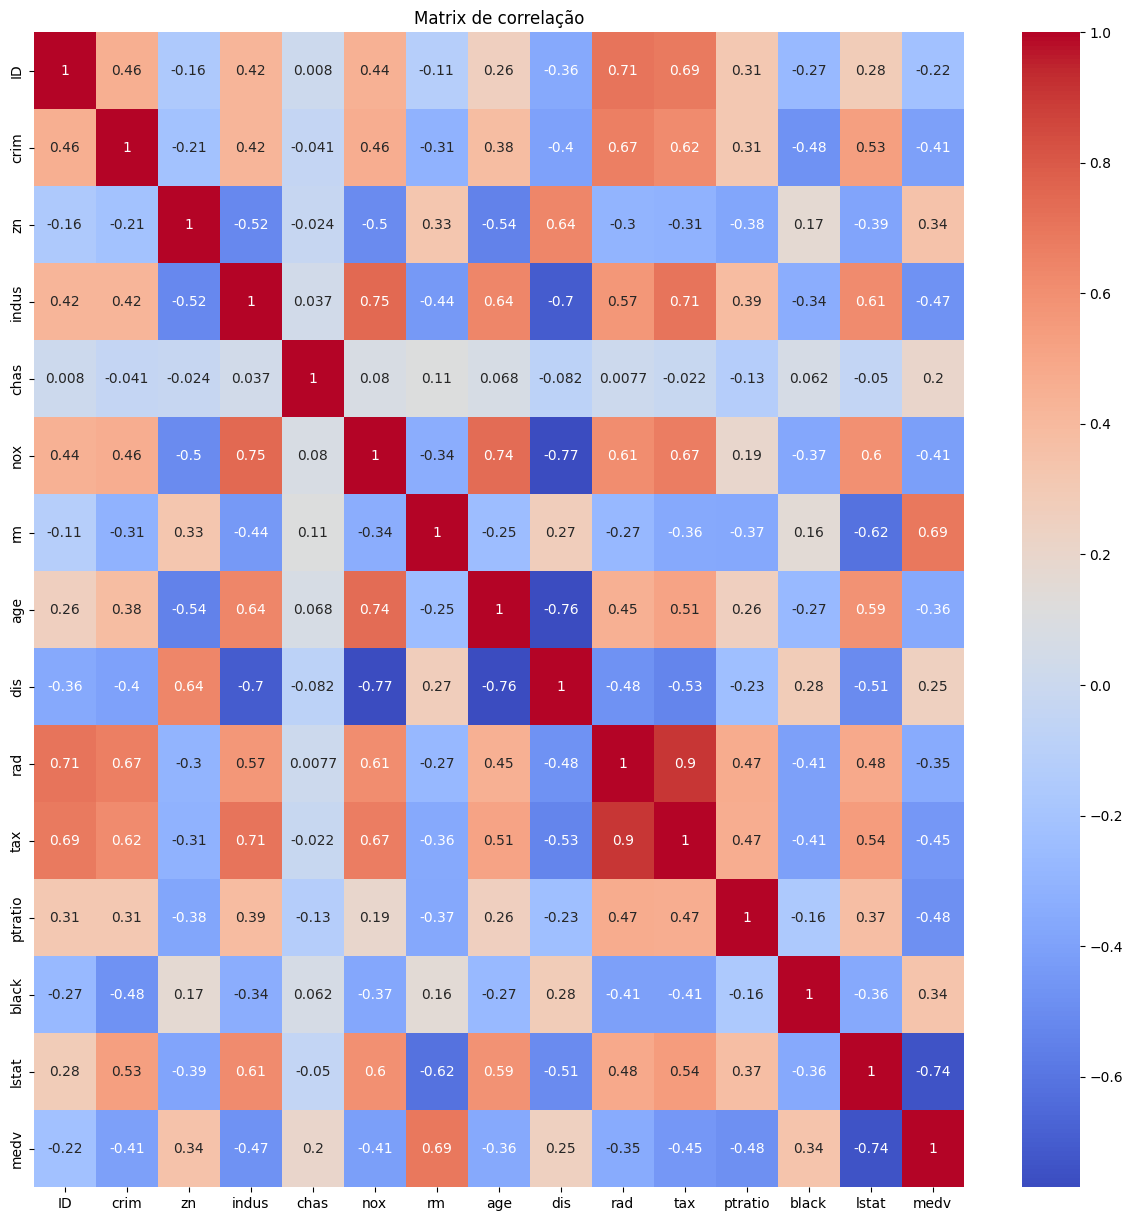

In [ ]:

plt.figure(figsize=(15,15))
# sns.heatmap(train.corr(), annot=True, cmap='Oranges', fmt='.2f')
df_corr = train.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Matrix de correlação')
plt.show()

* A função abaixo foi feita com auxilio do chatgpt3.5

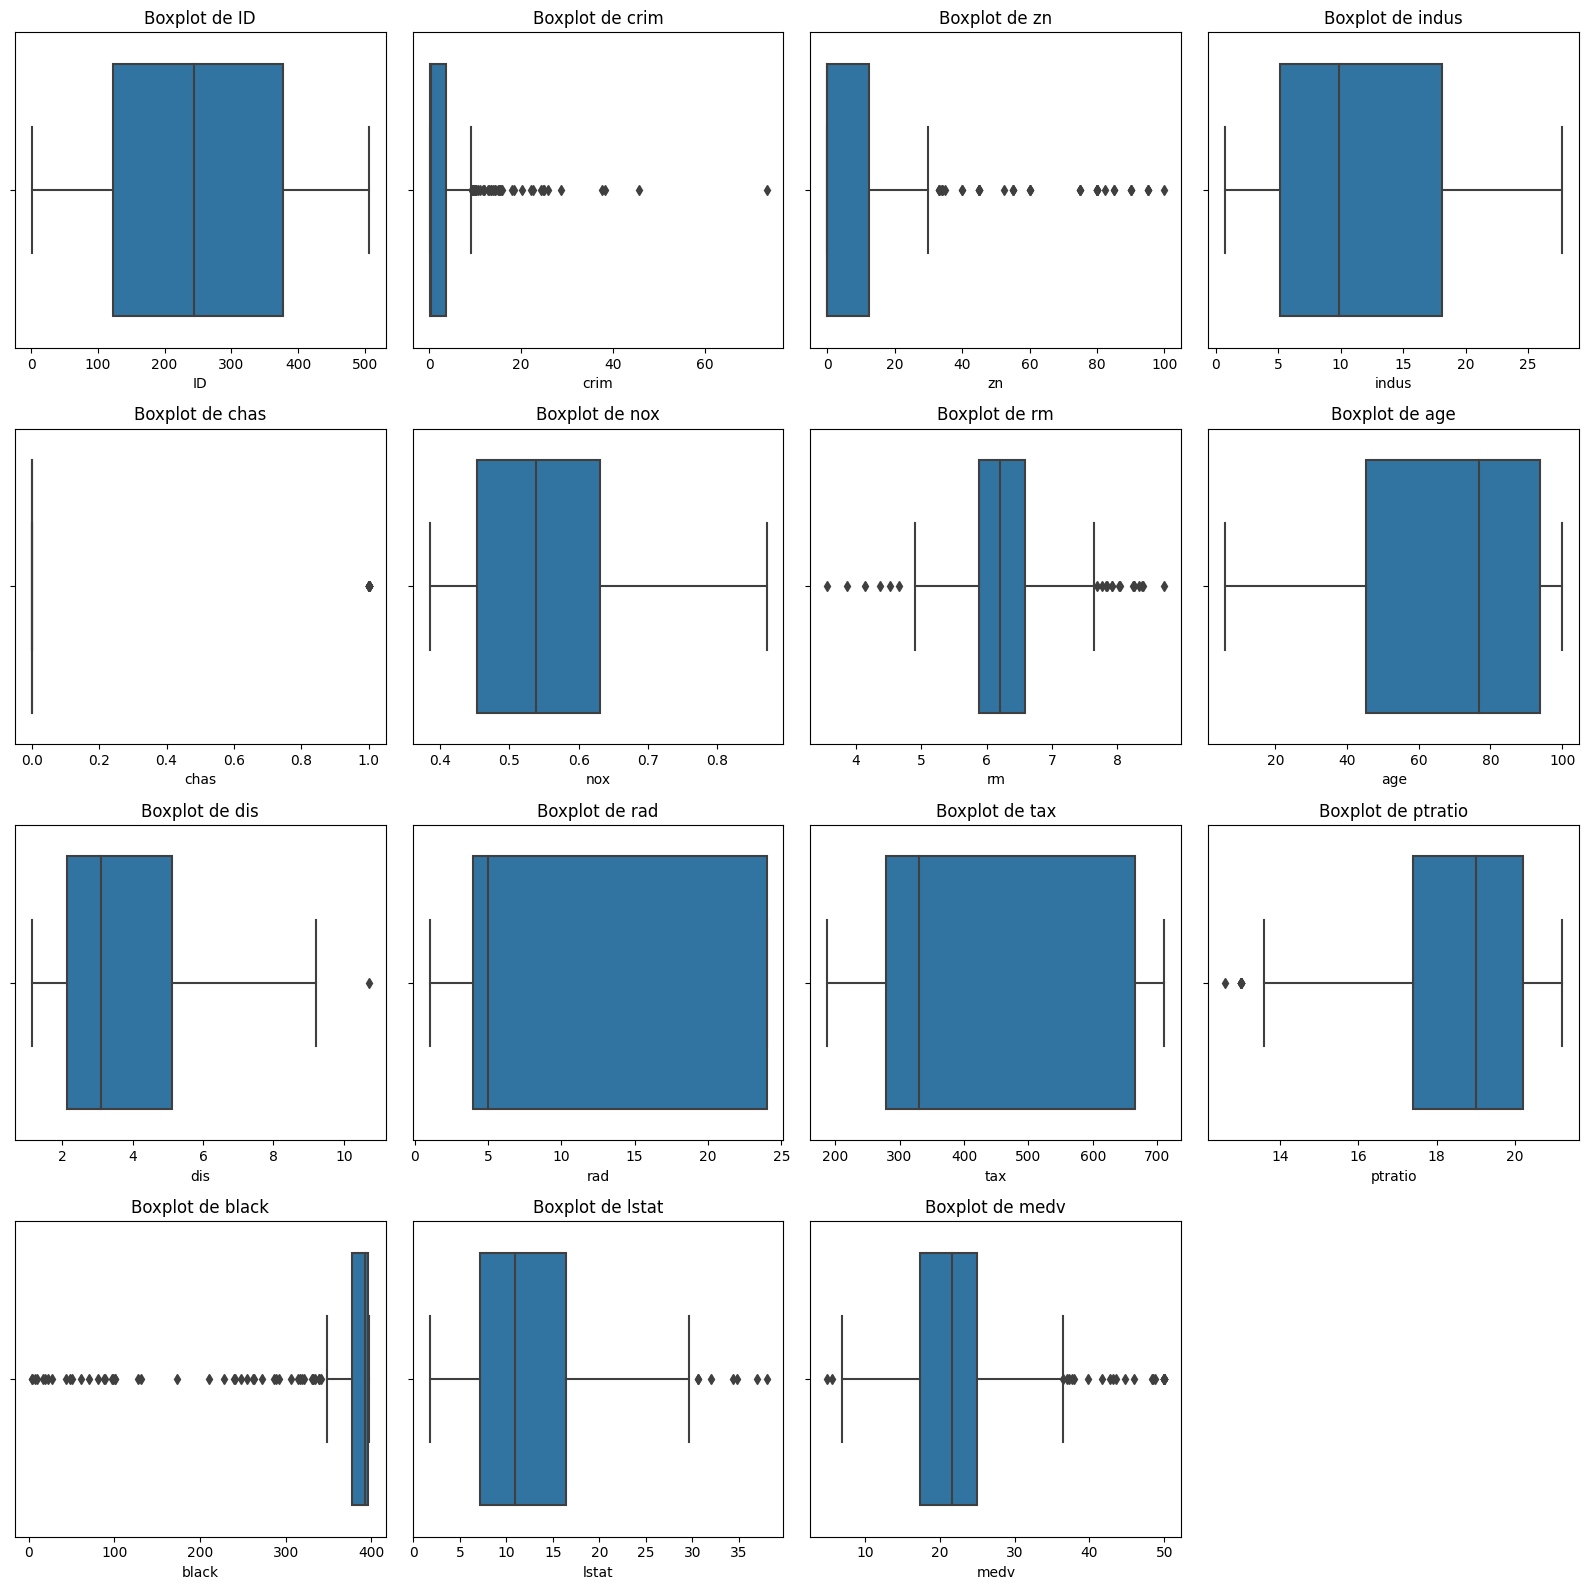

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenha a lista de variáveis do DataFrame
variaveis = train.columns

# Defina o número máximo de gráficos por linha
max_graficos_por_linha = 4

# Calcule o número total de linhas necessárias
num_linhas = len(variaveis) // max_graficos_por_linha + (len(variaveis) % max_graficos_por_linha > 0)

# Crie uma figura com subplots
fig, axs = plt.subplots(num_linhas, max_graficos_por_linha, figsize=(16, 4 * num_linhas))

# Flatten a matriz de eixos para facilitar o acesso aos subplots
axs = axs.flatten()

# Itere pelas variáveis e crie um gráfico de caixa para cada uma
for i, variavel in enumerate(variaveis):
    ax = axs[i]
    sns.boxplot(data=train, x=variavel, ax=ax)
    ax.set_title(f'Boxplot de {variavel}')

# Remova subplots não utilizados (se houver)
for i in range(len(variaveis), num_linhas * max_graficos_por_linha):
    fig.delaxes(axs[i])

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

## Etapa3

* Preparação dos dados:
1. Seleção.
2. Limpeza.
3. Construção.
4. Integração Formatação.

In [ ]:
train

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

colunas = ['crim','zn','rm', 'dis', 'ptratio', 'black', 'lstat']

for item in colunas:

    train[item] = scaler.fit_transform(train[[item]])
    test[item] = scaler.fit_transform(test[[item]])

train

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,-0.456875,0.322906,2.31,0,0.538,0.440154,65.2,0.192133,1,296,-1.465171,0.432990,-1.067772,24.0
1,2,-0.454016,-0.472123,7.07,0,0.469,0.221060,78.9,0.635528,2,242,-0.301616,0.432990,-0.478299,21.6
2,4,-0.453327,-0.472123,2.18,0,0.458,1.041952,45.8,1.189127,3,222,0.117264,0.406733,-1.356840,33.4
3,5,-0.448330,-0.472123,2.18,0,0.458,1.253933,54.2,1.189127,3,222,0.117264,0.432990,-1.018177,36.2
4,7,-0.445709,0.079980,7.87,0,0.524,-0.360821,66.6,0.935505,5,311,-1.511713,0.417953,-0.012106,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,-0.433512,-0.472123,9.69,0,0.585,-0.991072,73.5,-0.662253,6,391,0.349975,0.419919,0.366233,17.5
329,502,-0.449205,-0.472123,11.93,0,0.573,0.465762,69.1,-0.622468,1,273,1.187734,0.376197,-0.403198,22.4
330,503,-0.451569,-0.472123,11.93,0,0.573,-0.207170,76.7,-0.719074,1,273,1.187734,0.432990,-0.486801,20.6
331,504,-0.449459,-0.472123,11.93,0,0.573,1.010653,91.0,-0.779737,1,273,1.187734,0.432990,-0.974250,23.9


In [ ]:
list(train.columns)

['ID',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

## Etapa4

1. tecnica.
2. Desgn de teste.
3. Construção do modelo.
4. Avaliação.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

x_train = train.drop(columns=['ID','medv']).values

y_train = train['medv'].values

x_test = test.drop(columns=['ID']).values

y_teste = teste_target['medv'].values

Referencias:
* [RandomizedSearchCV](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
* [Hipermarametrização da Regrassão Logistica](https://levelup.gitconnected.com/a-comprehensive-analysis-of-hyperparameter-optimization-in-logistic-regression-models-521564c1bfc0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


models = [
    (
        'RFReg',
        RandomForestRegressor(),
        {
            'bootstrap': [True],
            'max_depth': [80, 90, 100, 110],
            'max_features': ['sqrt'],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [item for item in range(50, 1000, 50)] # numero de arvores na floresta
        }
    ),
    (
        'LinReg',
        LinearRegression(),
        {
            'n_jobs':[i for i in range(10)],
            'copy_X':[True, False],
            'fit_intercept':[True, False]
        }
    )
]

y_models = pd.DataFrame()
y_models['medv'] = y_teste

for name, clf, paramss in models:

    print(name)

    algritm = RandomizedSearchCV(clf, paramss, cv = 5)

    algritm.fit(x_train, y_train)

    y_pred = algritm.predict(x_test)

    algritm.best_params_

    y_models[name] = y_pred


RFReg
LinReg


## Etapa 5
* Métricas de Avaliação:
1. Erro Médio Absoluto (MAE - Mean Absolute Error): O MAE mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. Um MAE menor é melhor.
2. Erro Quadrático Médio (MSE - Mean Squared Error): O MSE mede a média das diferenças quadradas entre as previsões e os valores reais. Um MSE menor é melhor.
3. Raiz do Erro Quadrático Médio (RMSE - Root Mean Squared Error): O RMSE é a raiz quadrada do MSE e fornece uma interpretação na mesma escala que a variável de destino. Um RMSE menor é melhor.
4. Erro Médio Percentual Absoluto (MAPE - Mean Absolute Percentage Error): O MAPE calcula a média das porcentagens de erro absoluto em relação aos valores reais. É útil quando você deseja avaliar a precisão relativa do modelo em termos percentuais.
5. [Coeficiente de Determinação (R² - R-squared)](https://www.youtube.com/watch?v=wDJjmH3JFqc): O R² mede a proporção da variabilidade na variável de destino que é explicada pelo modelo. Um R² mais próximo de 1 indica um ajuste melhor.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def calculate_leaderboard (models:DataFrame) -> DataFrame:

    leaderboard = DataFrame(columns= list(models.drop(columns=['medv']).columns))

    for col in list(leaderboard.columns):

        leaderboard.at['MSE', col] = round(mean_squared_error(models['medv'].to_numpy(), models[col].to_numpy()), 4)

        leaderboard.at['MAE', col] = round(mean_absolute_error(models['medv'].to_numpy(), models[col].to_numpy()), 4)

        leaderboard.at['RMSE', col] = round(sqrt(mean_squared_error(models['medv'].to_numpy(), models[col].to_numpy())), 4)

        leaderboard.at['MAPE', col] = round(mean_absolute_percentage_error(models['medv'].to_numpy(), models[col].to_numpy()), 4)

        leaderboard.at['R2', col] = r2_score(models['medv'].to_numpy(), models[col].to_numpy())

    leaderboard['mean all'] = [round(i, 4) for i in leaderboard.mean(axis=1).values]

    return leaderboard

result = calculate_leaderboard(y_models)

result

,RFReg,LinReg,mean all
MSE,53.0346,63.1724,5.810350e+01
MAE,5.6217,6.258,5.939800e+00
RMSE,7.2825,7.9481,7.615300e+00
MAPE,0.2469,0.2749,2.609000e-01
R2,-4201831868106644445605268553728.0,-5005036809777056675692617400320.0,-4.603434e+30


### Gráficos de Avaliação:
1. Gráfico de Dispersão (Scatter Plot): Plote um gráfico de dispersão dos valores reais em relação às previsões do modelo. Isso permite visualizar visualmente como as previsões se comparam aos valores reais.
2. Gráfico de Resíduos (Residual Plot): Plote um gráfico de resíduos, que mostra a diferença entre os valores reais e as previsões em relação às previsões. Isso ajuda a identificar padrões nos erros do modelo.
3. Gráfico QQ (Quantile-Quantile): Use um gráfico QQ para verificar se os resíduos do modelo seguem uma distribuição normal. Resíduos normalmente distribuídos são uma suposição importante em muitos modelos de regressão.
4. Curva ROC (Receiver Operating Characteristic): Se estiver usando uma regressão logística ou outra forma de regressão para classificação, uma curva ROC pode ser útil para avaliar o desempenho em diferentes pontos de corte.
5. Gráfico de Importância de Recursos (Feature Importance Plot): Se você estiver usando modelos como Árvores de Decisão ou Random Forest, pode plotar a importância de recursos para entender quais características são mais importantes para o modelo.

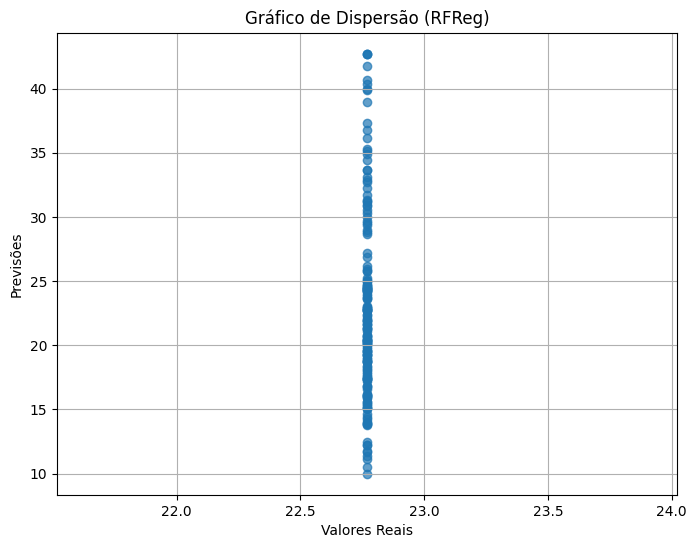

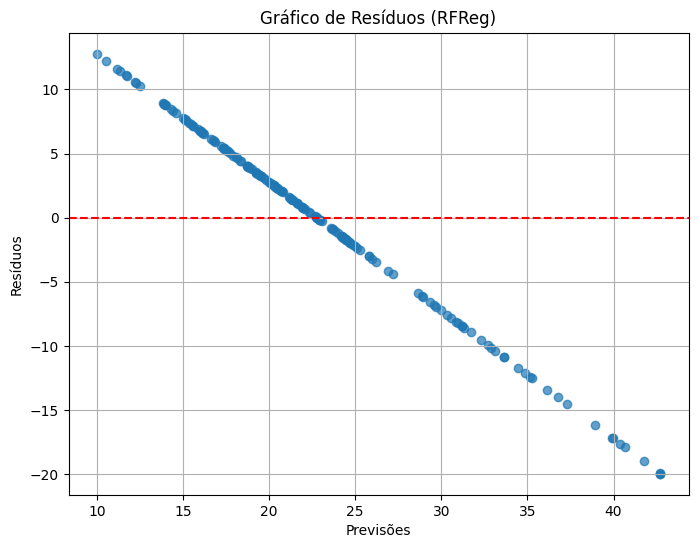

MAE (RFReg): 5.62
MSE (RFReg): 53.03
RMSE (RFReg): 7.28
R² (RFReg): -4201831868106644445605268553728.00


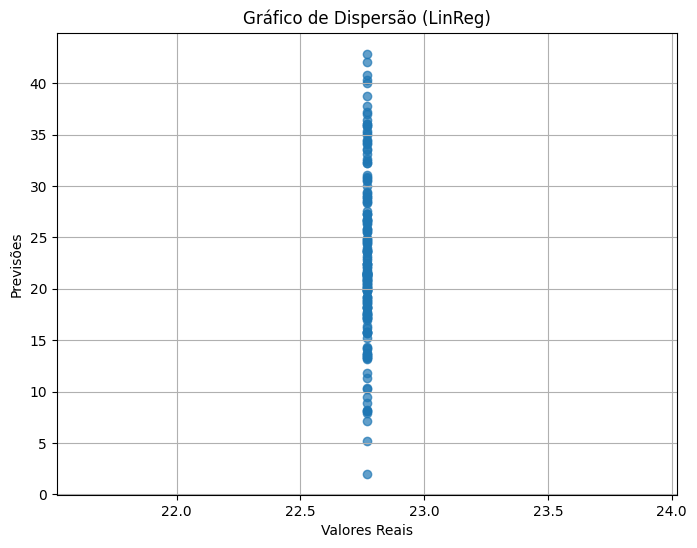

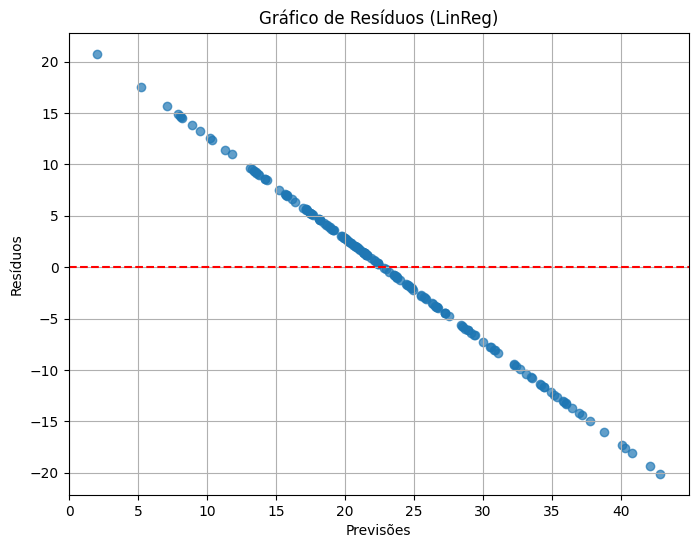

MAE (LinReg): 6.26
MSE (LinReg): 63.17
RMSE (LinReg): 7.95
R² (LinReg): -5005036809777056675692617400320.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Suponha que você tenha um DataFrame chamado 'df' com as previsões dos algoritmos
# e um DataFrame 'y_models['medv'].to_numpy()' com os valores reais

# Loop para percorrer cada coluna do DataFrame 'df'
for col in y_models.drop(columns=['medv']).columns:
    y_pred = y_models[col]

    # Calcular as métricas
    mae = mean_absolute_error(y_models['medv'].to_numpy(), y_pred)
    mse = mean_squared_error(y_models['medv'].to_numpy(), y_pred)
    rmse = mean_squared_error(y_models['medv'].to_numpy(), y_pred, squared=False)
    r2 = r2_score(y_models['medv'].to_numpy(), y_pred)

    # Plotar gráfico de dispersão
    plt.figure(figsize=(8, 6))
    plt.scatter(y_models['medv'].to_numpy(), y_pred, alpha=0.7)
    plt.title(f'Gráfico de Dispersão ({col})')
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.grid(True)
    plt.show()

    # Plotar gráfico de resíduos
    plt.figure(figsize=(8, 6))
    residuals = y_models['medv'].to_numpy() - y_pred
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.title(f'Gráfico de Resíduos ({col})')
    plt.xlabel('Previsões')
    plt.ylabel('Resíduos')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

    # Outros gráficos e métricas podem ser adicionados aqui

    # Imprimir métricas
    print(f'MAE ({col}): {mae:.2f}')
    print(f'MSE ({col}): {mse:.2f}')
    print(f'RMSE ({col}): {rmse:.2f}')
    print(f'R² ({col}): {r2:.2f}')


In [ ]:
submission = pd.Series(y_models['LinReg'], index=teste_target['ID'], name='medv')

#submission.to_csv("submit.csv")